<font color = green >

# Evaluation
</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook

<font color = green >

## Digits dataset 
</font>

In [3]:
from sklearn.datasets import load_digits
# 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 
# and the number of pixels on are counted in each block.
# This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 
# This reduces dimensionality and gives invariance to small distortions.

In [4]:
digits = load_digits()
X, y, labels = digits.data, digits.target, digits.target_names
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
print ('X[1]=\n{}'.format(X[1,:]))


X.shape=  (1797, 64)
y.shape=  (1797,)
X[1]=
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [6]:
{label: count for label, count in zip(labels, np.bincount(y))}


{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

<font color = green >

## Make it imbalanced
</font>

In [7]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
{label: count for label, count in zip(labels, np.bincount(y_binary_imbalanced))}

{0: 1615, 1: 182}

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y_binary_imbalanced, random_state = 0)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)

X_train.shape=  (1347, 64)
X_test.shape=  (450, 64)
y_train.shape=  (1347,)
y_test.shape=  (450,)


#### Review the distribution in train and test set 

In [10]:
print ('Train Set:',{label: count for label, count in zip(labels, np.bincount(y_train))})
print ('Test Set:',{label: count for label, count in zip(labels, np.bincount(y_test))})

Train Set: {0: 1208, 1: 139}
Test Set: {0: 407, 1: 43}


In [11]:
train_labels= {label: count for label, count in zip(labels, np.bincount(y_train))}
print ('train ratio: ',list(train_labels.values())[1]/list(train_labels.values())[0])
test_labels= {label: count for label, count in zip(labels, np.bincount(y_test))}
print ('test ratio: ', list(test_labels.values())[1]/list(test_labels.values())[0])


train ratio:  0.11506622516556292
test ratio:  0.10565110565110565


<font color = green >

## Accuracy of SVC
</font>

In [12]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=0.06, probability=True).fit(X_train, y_train) # Lets assume we trained this classifier

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))


train accuracy= 90.126%
test accuracy= 90.444%


<font color = green >

## Accuracy of Dummy classifier
</font>

In [13]:
from sklearn.dummy import  DummyClassifier
clf_dummy_majority= DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
#  'most_frequent' will predict always class 0
print ('Check it predicts all zeros:')
clf_dummy_majority.predict(X_test)[:30]

Check it predicts all zeros:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
print("train accuracy= {:.3%}".format(clf_dummy_majority.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf_dummy_majority.score (X_test, y_test)))
clf_dummy_majority= clf

train accuracy= 89.681%
test accuracy= 90.444%


#### Conclusion: SVC with rbf kernel is not better than dummy on test set

In [15]:
# we may train better model e.g
clf = SVC().fit(X_train, y_train) # linear gives better results
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
clf_svc = clf

train accuracy= 99.926%
test accuracy= 99.556%


In [16]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train) # linear gives better results
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))
clf_svc = clf

train accuracy= 100.000%
test accuracy= 97.778%


#### Use dummy classifier as baseline to evaluate your model

In [16]:
# ->  *6

<font color = green >

## Confusion Matrix
</font>

<font color = green >

#### Ideal classifier  
</font>

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [20]:
confusion_matrix(y_test, y_test)

array([[407,   0],
       [  0,  43]])

<font color = green >

#### Dummy most majority
</font>

In [21]:
y_dummy_majority= clf_dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy_majority)
confusion

array([[407,   0],
       [ 43,   0]])

<font color = green >

#### Dummy stratified
</font>

In [22]:
clf = DummyClassifier (strategy='stratified', random_state=2020) # default: strategy='stratified'
clf.fit(X_train,y_train)
y_dummy_stratified = clf.predict(X_test)
confusion_matrix(y_test, y_dummy_stratified )

array([[370,  37],
       [ 38,   5]])

####  Note: It depends on random_state

In [23]:
cm= confusion_matrix(y_test, y_dummy_stratified )
cm.sum(axis = 0), cm.sum(axis = 0)[1]/cm.sum(axis = 0)[0]
# Since it predicts using sampling by distribution the prediction on test set may vary 

(array([408,  42]), 0.10294117647058823)

<font color = green >

#### SVC
</font>

In [24]:
y_svc= clf_svc.predict(X_test)
confusion_matrix(y_test, y_svc)

array([[402,   5],
       [  5,  38]])

<font color = green >

#### Logistic Regression
</font>

In [25]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(C=0.001).fit (X_train, y_train)
y_lr= clf.predict(X_test)
confusion_matrix(y_test, y_lr)

array([[407,   0],
       [  6,  37]])

<font color = green >

#### Decision Tree
</font>

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
y_dt = clf.predict(X_test)
confusion_matrix(y_test, y_dt)

array([[404,   3],
       [ 13,  30]])

In [27]:
# ->  *10

<font color = green >

## Auxiliary drawing functions 
</font>

In [28]:

def plot_data_logistic_regression(X,y,legend_loc= None, title= None):
    '''
    :param X: 2 dimensional ndarray
    :param y:  1 dimensional ndarray. Use y.ravel() if necessary
    :return:
    '''

    positive_indices = (y == 1)
    negative_indices = (y == 0)
#     import matplotlib as mpl
    colors_for_points = ['grey', 'orange'] # neg/pos

    plt.scatter(X[negative_indices][:,0], X[negative_indices][:,1], s=40, c=colors_for_points [0], edgecolor = 'black', label='negative', alpha = 0.7)
    plt.scatter(X[positive_indices][:,0], X[positive_indices][:,1], s=40, c=colors_for_points [1], edgecolor = 'black',label='positive', alpha = 0.7)
    plt.title(title)
    plt.legend(loc= legend_loc)
    
def draw_linear_decision_boundaries_multiclass(clf,X):
    '''draws only the line  - use existing figure for it '''
    colors=  ['green','grey', 'orange', 'brown']
    x_line = np.linspace(X[:,0].min(),X[:,0].max(), 100)
    for w, b, color in zip(clf.coef_, clf.intercept_, colors):
        # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
        # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
        # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
        y_line = -(x_line  * w[0] + b) / w[1]
        ind = (X[:,0].min()< x_line) & (x_line <X[:,0].max()) & (X[:,1].min()< y_line) & (y_line <X[:,1].max() )
        plt.plot(x_line[ind] , y_line[ind], '-', c=color, alpha=.8)

    
def plot_decision_boundary_universal(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =None, is_to_show_train= True):
    '''
    expected to be universal for binary and multiclass classification but not tested for binary 
    '''
    # Create color maps - required by pcolormesh
    from matplotlib.colors import  ListedColormap
    features_number= X_train.shape[1]
    colors_for_areas= colors_for_points =  np.array(['grey', 'orange', 'green', 'brown'][:features_number])
    cmap_light = ListedColormap(colors_for_areas)

    mesh_step_size = precision #.01  # step size in the mesh
    if X_test is None or y_test is None:
        show_test= False
        X= X_train
    else:
        show_test= True
        X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Create grids of pairs
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))
    # Flatten all samples
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])
    if precision<0.05:
        print ('Calling to predict for all grid values (precision of drawing = {},\n you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Reshape the result to original meshgrid shape
    Z = Z.reshape(xx1.shape)

    if ax:
        plt.sca(ax)

    # Plot all meshgrid prediction
    plt.pcolormesh(xx1, xx2,Z, cmap = cmap_light, alpha=0.2)

    if is_to_show_train:
        # Plot train set
        plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size,
                    c=colors_for_points[y_train.astype(int)], edgecolor = 'black',alpha=0.6)
    # Plot test set
    if show_test:
        plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size,
                c=colors_for_points[y_test.astype(int)],edgecolor = 'black',alpha=0.6)
    if  is_extended:
        
        # Create legend
        if labels is None:
            labels= ['negative','positive'] # assume this is for binary or for muticlass with labels 
        import matplotlib.patches as mpatches # use to assign lavels for colored points
        patches= [mpatches.Patch(color=colors_for_points[i], label=labels[i]) for i in range (len(labels))]
        plt.legend(handles=patches)
        if features is None:
            plt.xlabel('feature 1')
            plt.ylabel('feature 2')
        else: 
            plt.xlabel(features[0])
            plt.ylabel(features[1])

    else:
        plt.tick_params(
        top =False,
        bottom= False,
        left  = False,
        labelleft = False,
        labelbottom = False
        )
    plt.title(title)


<font color = green >

## Synthetic dataset
</font>

In [29]:
from sklearn.datasets import make_blobs
X_mk8, y_mk8 = make_blobs(n_samples = 200, n_features = 2, centers = 4, # centers impacts for y
                       cluster_std = 4, random_state = 4)
X = X_mk8
y = y_mk8 == 3 # make it imbalanced 
plt.figure()
plot_data_logistic_regression(X,y, title='make_blobs imbalanced')

<IPython.core.display.Javascript object>

<font color = green >

### Logistic Regression
</font>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
# draw_linear_decision_boundaries_multiclass(clf,X)

print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))


train accuracy= 84.667%
test accuracy= 94.000%


In [31]:
plt.figure()
plot_decision_boundary_universal(clf, X_train, y_train,X_test, y_test, title='Logistic Regression', precision=0.1,plot_symbol_size = 50, ax= None,labels= None, features =['x0', 'x1'])
draw_linear_decision_boundaries_multiclass(clf,X)

<IPython.core.display.Javascript object>

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<font color = green >

### Perfromance on test set 
</font>

In [33]:
# plot only test samples  to review  the confusiuon matrix 
plt.figure()
plot_decision_boundary_universal(clf, X_train= X_train, y_train= y_train, X_test=  X_test, y_test= y_test, title='Test set only', 
                                 precision=0.1,
                                 plot_symbol_size = 50, 
                                 ax= None,  
                                 is_extended=True, 
                                 labels= None, 
                                 features =['x0', 'x1'],
                                 is_to_show_train= False)
draw_linear_decision_boundaries_multiclass(clf,X)
y_predicted = clf.predict(X_test)
print ('confusion_matrix:\n',confusion_matrix(y_test, y_predicted))
print ('recall_score = {:.2}\nprecision_score = {:.2}'.format(
    recall_score(y_test, y_predicted),precision_score(y_test, y_predicted)))


<IPython.core.display.Javascript object>

confusion_matrix:
 [[37  1]
 [ 2 10]]
recall_score = 0.83
precision_score = 0.91


<font color = green >

## Probabilty of prediction
</font>

In [34]:
clf = LogisticRegression().fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
y_pedicted = clf.predict(X_test)
df_proba = pd.DataFrame({'true_value':  y_test, 'predicted': y_predicted,'probability of 0': y_proba[:,0],'probability of 1': y_proba[:,1]})
df_proba.sample(10, random_state=10)

,true_value,predicted,probability of 0,probability of 1
37,True,True,0.393899,0.606101
23,False,False,0.979184,0.020816
44,False,False,0.994098,0.005902
42,True,True,0.140527,0.859473
47,True,False,0.548830,0.451170
20,False,False,0.932933,0.067067
3,False,True,0.474655,0.525345
30,False,False,0.940976,0.059024
7,False,False,0.997427,0.002573
6,False,False,0.998645,0.001355


<font color = green >

### Changing threshold of prediction
</font>

In [35]:
clf.predict_proba(X[:10])

array([[9.79560364e-01, 2.04396361e-02],
       [9.20725466e-01, 7.92745340e-02],
       [9.90324210e-01, 9.67579025e-03],
       [9.99213949e-01, 7.86051431e-04],
       [3.93899223e-01, 6.06100777e-01],
       [9.98645043e-01, 1.35495692e-03],
       [3.33065062e-01, 6.66934938e-01],
       [9.88113958e-01, 1.18860423e-02],
       [7.33101344e-02, 9.26689866e-01],
       [4.22138041e-01, 5.77861959e-01]])

In [36]:
y_proba_lr = clf.fit(X_train, y_train).predict_proba(X_test)
threshold=0.6 # 0.6 - for precision oriented # 0.3 - for recall oriented  
clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold

plt.figure()
plot_decision_boundary_universal(clf, X_test, y_test, title='threshold={}'.format(threshold), precision=0.1,plot_symbol_size = 50, ax= None,  is_extended=True, labels= None, features =['x0', 'x1'])

y_predicted = clf.predict(X_test)
print ('confusion_matrix:\n',confusion_matrix(y_test, y_predicted))
print ('recall_score = {:.2}\nprecision_score = {:.2}'.format(
    recall_score(y_test, y_predicted),precision_score(y_test, y_predicted)))


<IPython.core.display.Javascript object>

confusion_matrix:
 [[38  0]
 [ 3  9]]
recall_score = 0.75
precision_score = 1.0


<font color = green >

### Decision function
</font>

In [37]:
clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_test)
y_pedicted = clf.predict(X_test)

df_dec_func = pd.DataFrame({'true_value':  y_test, 'predicted': y_predicted,'score': y_score})
df_dec_func.sample(10, random_state=10)


,true_value,predicted,score
37,True,True,0.430951
23,False,False,-3.851006
44,False,False,-5.126578
42,True,True,1.810921
47,True,False,-0.195945
20,False,False,-2.632646
3,False,False,0.101466
30,False,False,-2.768972
7,False,False,-5.960187
6,False,False,-6.602630


<font color = green >

### Accuracy, Recall, Precision, F1-score

</font>

In [38]:
y_predicted = clf.predict(X_test)
print ('accuracy = {:.2}'.format(accuracy_score(y_test, y_predicted)))
print ('precision = {:.2}'.format(precision_score(y_test, y_predicted)))
print ('recall = {:.2}'.format(recall_score(y_test, y_predicted)))
print ('f1_score  = {:.2}'.format(f1_score(y_test, y_predicted)))

accuracy = 0.94
precision = 0.91
recall = 0.83
f1_score  = 0.87


<font color = green >

### Classification report 

</font>

In [39]:
from sklearn.metrics import classification_report

In [40]:
print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        38
    Positive       0.91      0.83      0.87        12

    accuracy                           0.94        50
   macro avg       0.93      0.90      0.92        50
weighted avg       0.94      0.94      0.94        50



<font color = green >

#### Classification report  for dummy stratified classifier

</font>

In [41]:
clf = DummyClassifier (random_state=0).fit(X_train,y_train)
y_predicted = clf.predict(X_test)
print (confusion_matrix(y_test, y_predicted))
print (classification_report(y_test, y_predicted, target_names=['Negative', 'Positive']))

[[38  0]
 [12  0]]
              precision    recall  f1-score   support

    Negative       0.76      1.00      0.86        38
    Positive       0.00      0.00      0.00        12

    accuracy                           0.76        50
   macro avg       0.38      0.50      0.43        50
weighted avg       0.58      0.76      0.66        50



/home/x_lts/.pyenv/versions/3.10.1/envs/xpln_comparison/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/x_lts/.pyenv/versions/3.10.1/envs/xpln_comparison/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/x_lts/.pyenv/versions/3.10.1/envs/xpln_comparison/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

<font color = green >

### Precision Recall Curve

</font>

In [42]:
clf = LogisticRegression().fit(X_train, y_train)
y_score = clf.decision_function(X_train)
thresholds = np.linspace(y_score.min()/4, y_score.max()/3.7, 20)

recall = []
precision= []
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
for threshold in  thresholds:
    clf.predict = lambda X: clf.predict_proba(X)[:,1]>threshold
    recall.append(recall_score(y_train,clf.predict(X_train)))
    precision.append(precision_score(y_train,clf.predict(X_train)))
df = pd.DataFrame({'threshold':  thresholds, 'recall': recall,'precision': precision})


plt.plot(precision, recall, '-o', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.gca().set_aspect('equal')
# Avoid duplicates:  
df.groupby(['recall','precision']).last().reset_index().sort_values('threshold').set_index('threshold')


<IPython.core.display.Javascript object>

/home/x_lts/.pyenv/versions/3.10.1/envs/xpln_comparison/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/x_lts/.pyenv/versions/3.10.1/envs/xpln_comparison/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,recall,precision
threshold,,
-0.058279,1.000000,0.253333
0.098871,1.000000,0.506667
0.256021,0.842105,0.615385
0.413170,0.736842,0.682927
0.570320,0.552632,0.677419
0.727470,0.289474,0.785714
0.884620,0.157895,0.857143
1.198919,0.000000,0.000000


In [43]:
from sklearn.metrics import precision_recall_curve

closest_zero threshold : -0.04821156886960498


<IPython.core.display.Javascript object>


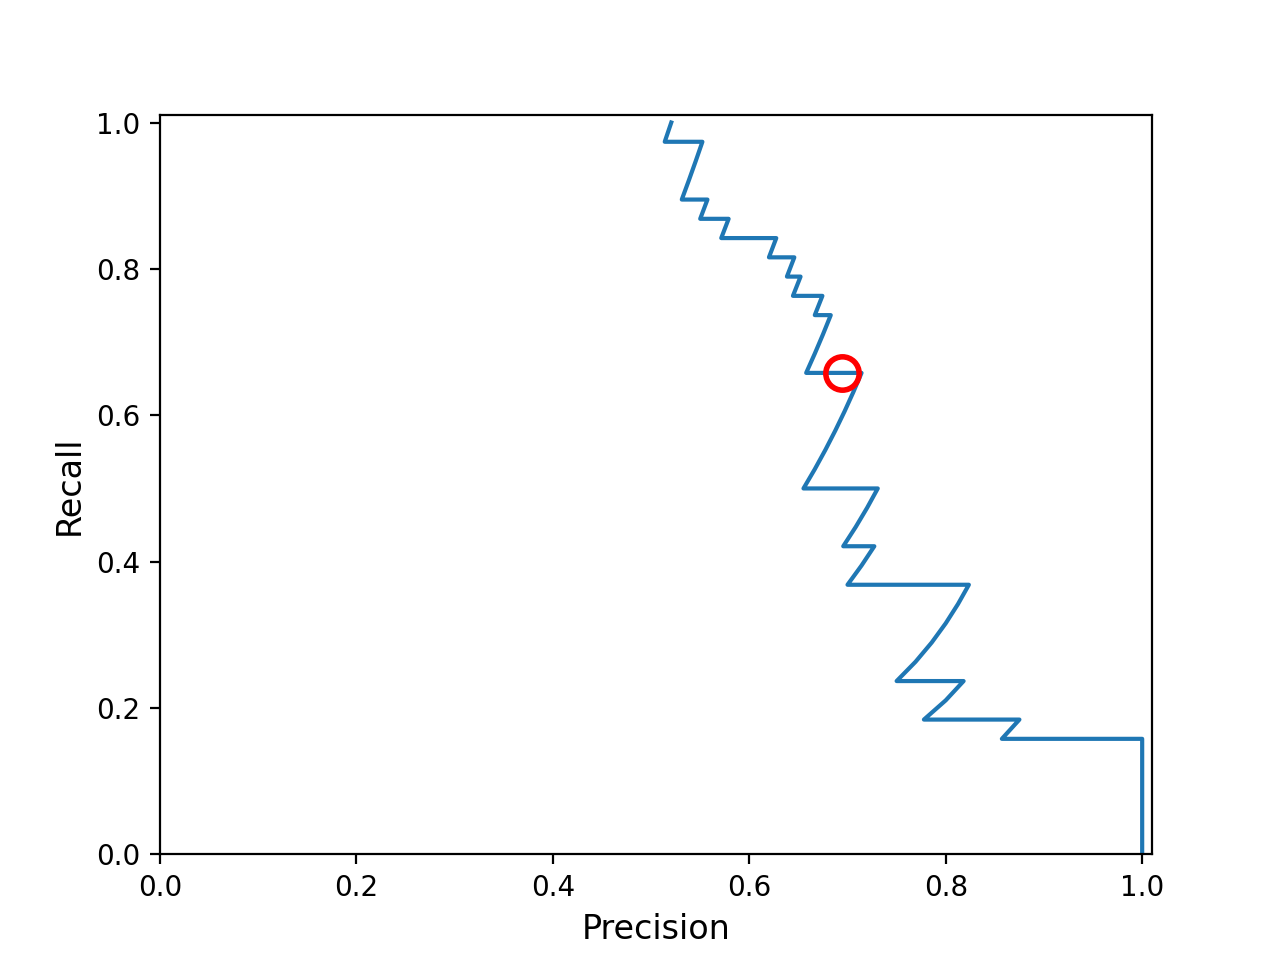

Text(0, 0.5, 'Recall')

In [44]:
# y_score = clf.decision_function(X_test)
# precision, recall, thresholds = precision_recall_curve(y_test, y_score)
 # Note: it is usually performed on test set this time it uses train test for purpose of demo 
y_score = clf.decision_function(X_train)
precision, recall, thresholds = precision_recall_curve(y_train, y_score)

# print ('precision\n', precision)
# print ('recall:\n', recall)
# print ('thresholds:\n', thresholds)
closest_zero = np.argmin(np.abs(thresholds)) # the closest to zero refers to the default threshold of classifier
print ('closest_zero threshold : {}'.format(thresholds [closest_zero]))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, '-', markersize = 4, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=2)
plt.xlabel('Precision', fontsize=12)
plt.ylabel('Recall', fontsize=12)

<font color = green >

### Receiver operating characteristic (ROC) curve 

</font>

In [50]:
from sklearn.metrics import roc_curve, auc # Receiver operating characteristic

[        inf -0.06500413 -0.57917557 -0.58239371 -0.6203572  -0.65373784
 -0.65888498 -0.67115176 -0.70685632 -0.76271588 -0.76631007 -0.85665372
 -0.85803588 -0.8581822  -0.87091534 -1.45939455]


Text(0.5, 1.0, 'ROC curve')

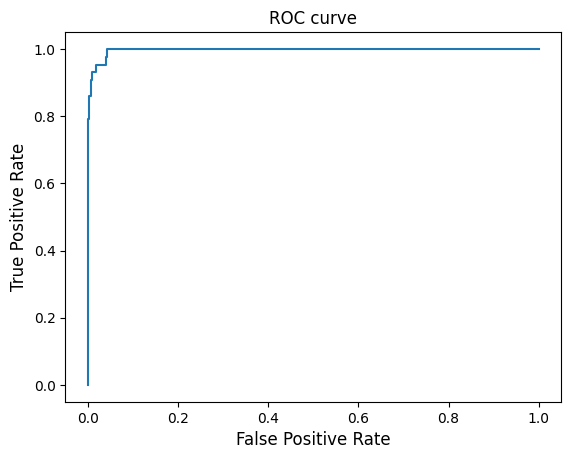

In [ ]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score) # third param is threshold
plt.figure()
plt.plot(fpr, tpr, '-', markersize = 4, label='Precision-Recall Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title ('ROC curve')

In [48]:
# ->  *26

<font color = green >

### AUC score

</font>

In [49]:
plt.fill_between(fpr,0,tpr, facecolors='orange',alpha=0.25)
roc_auc = auc(fpr, tpr) # Compute Area Under the Curve (AUC) using the trapezoidal rule
print ('roc_auc = {:.4}'.format(roc_auc))

roc_auc = 0.9846


<font color = green >

#### Direct roc_auc_score function

</font>

In [48]:
from sklearn.metrics import roc_auc_score
y_score= clf.decision_function(X_test)
print('AUC: ', roc_auc_score(y_test, y_score)) 
y_score

AUC:  0.9969716016227644


array([-1.27466085, -1.15526004, -1.16232413, -1.32777367, -1.38384652,
       -0.94163846, -0.35156103, -1.1656605 , -1.35886753, -1.2320874 ,
       -1.08695151, -0.90488507, -1.30065411, -0.9944655 , -0.98101625,
       -1.07006562, -0.33406134, -1.41095343, -1.17432233, -1.26553107,
       -1.32854328, -1.16343142, -1.31168123, -1.24539086, -1.29468019,
       -1.23618433, -1.25579343, -1.23148208, -1.2639309 , -1.22084339,
       -1.26514734, -1.18960282, -1.31407838, -1.0209257 , -1.22380916,
       -1.09033726, -1.14542873, -0.55213025, -1.4023208 , -0.46658331,
       -0.78280031, -1.34039916, -1.1913093 , -1.31066684, -0.76631007,
       -1.40712071, -0.98513507, -1.23696371, -1.13592573, -0.3150272 ,
       -1.20377067, -0.93609647, -1.14622189, -1.32584434, -1.42596369,
       -1.41534041, -1.11763037, -0.38825649, -1.36361597, -1.22399743,
       -1.32513989, -0.94313975, -1.27076796, -1.13283591, -0.55621025,
       -1.24085966, -1.20314554, -1.11343555, -1.20609044, -0.44

In [51]:
# -> 27

<font color = green >

## Multi-class confusion matrix

</font>

In [52]:
import seaborn as sns

<IPython.core.display.Javascript object>


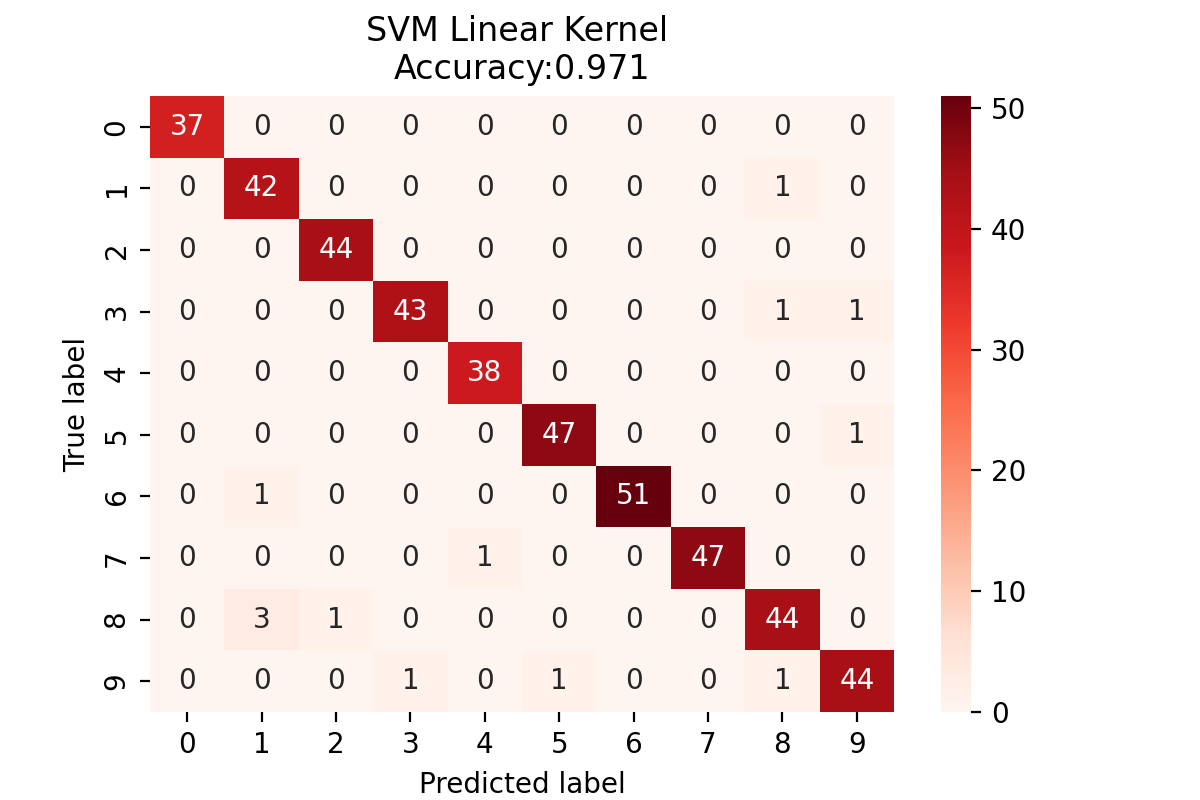

Text(0.5, 14.722222222222216, 'Predicted label')

In [53]:
digits = load_digits()
X, y, labels = digits.data, digits.target, digits.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
df = pd.DataFrame(confusion,index = np.arange(10), columns = np.arange(10))

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap='Reds') #  "YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

<font color = green >

#### RBF kernel

</font>

<IPython.core.display.Javascript object>


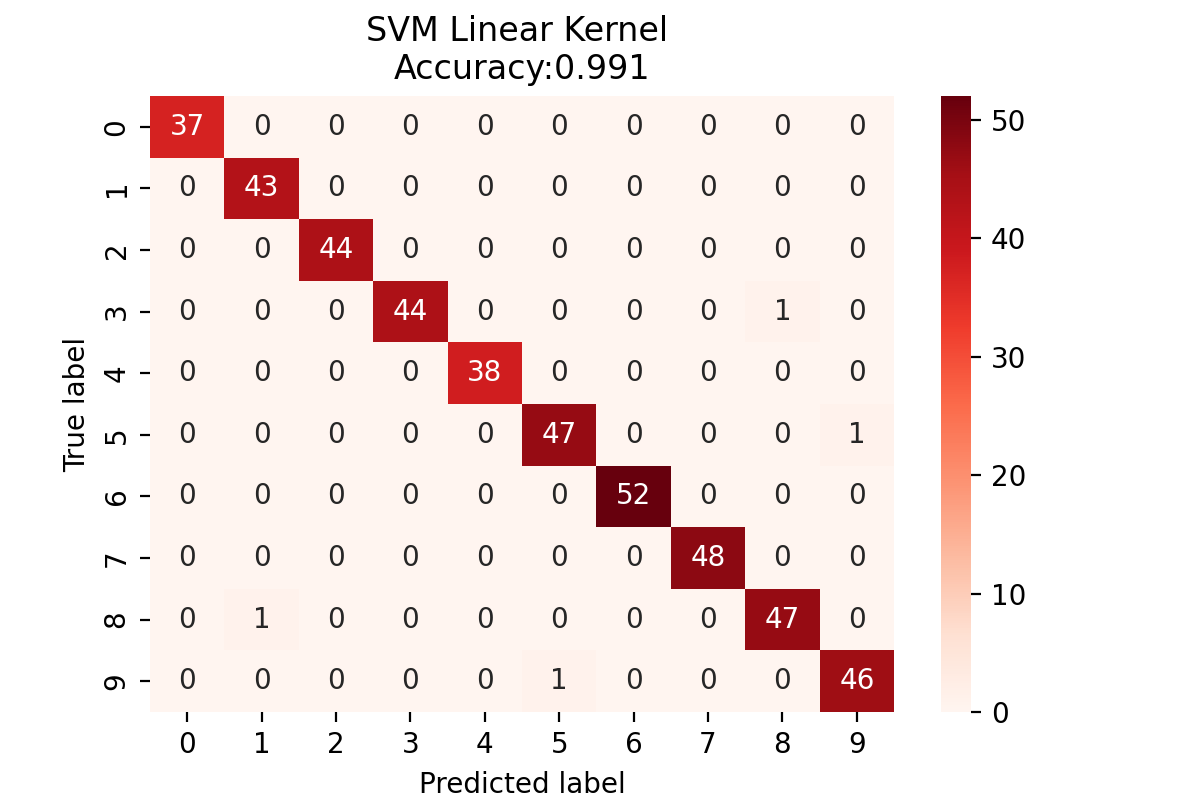

Text(0.5, 14.722222222222216, 'Predicted label')

In [54]:
clf = SVC().fit(X_train, y_train)
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
df = pd.DataFrame(confusion,index = np.arange(10), columns = np.arange(10))

plt.figure(figsize=(6,4))
sns.heatmap(df, annot=True, cmap='Reds') #  "YlGnBu")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

<font color = green>

### Classification report  

</font>



In [55]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [56]:
# -> 30

<font color = green >
    
## Average metrics

</font>



<font color = green >
    
#### Average precision

</font>



In [57]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, y_predicted, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, y_predicted, average = 'macro')))



Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


<font color = green >
    
#### Average F1- score

</font>



In [58]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, y_predicted, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, y_predicted, average = 'macro')))


Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


In [59]:
# -> 33

<font color = green>

##  Cross validation score
</font>



In [31]:
from sklearn.model_selection import cross_val_score
# from sklearn.neural_network import MLPClassifier

In [ ]:
digits = load_digits()
X, y, labels = digits.data, digits.target, digits.target_names
y = y == 1
clf = SVC(kernel='linear', C=1)
# clf = SVC()
# clf = MLPClassifier()


print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5, scoring = 'accuracy'))
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))


In [62]:
np.average(cross_val_score(clf, X, y, cv=10))

0.968274363749224

In [64]:
from sklearn.metrics import SCORERS
print(sorted(list(SCORERS.keys())))


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


<font color = green >

### Regression metrics

</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (r2_score, mean_absolute_error,
                            mean_squared_error, root_mean_squared_error)
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = np.random.rand(30, 1) * 30  
y = 0.05 * X**2 - 2 * X + 15 + np.random.randn(30, 1) 

X_train = X[:20]
y_train = y[:20]
X_test = X[20:]
y_test = y[20:]

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
# Calculate R2, MAE, MSE, RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R-Squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-Squared (R2): 0.2610691923568653
Mean Absolute Error (MAE): 2.922188750927864
Mean Squared Error (MSE): 12.177770623306323
Root Mean Squared Error (RMSE): 3.4896662624535204


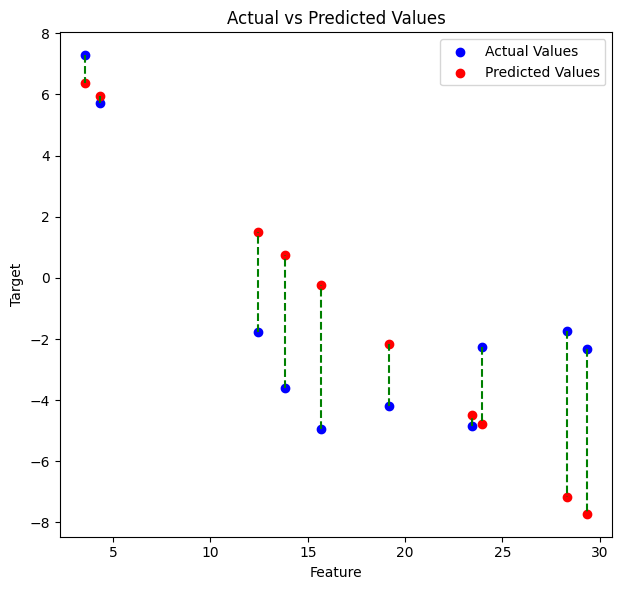

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')

for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='green', linestyle='--')

plt.title('Actual vs Predicted Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()